In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics 
import warnings
warnings.filterwarnings("ignore")

In [2]:
Ex=np.array([[1, 0.61, 0.22],[0.61, 1, 0.37], [0.22, 0.37, 1]])
H=np.array([[0, 1, 0],[0, 0, 1]])
Ey=np.array([[0.5, 0],[0, 0.5]])

In [3]:
#(a)
K=Ex@H.T@np.linalg.inv(Ey+H@Ex@H.T)
print(K)

[[0.39449151 0.04935876]
 [0.64507122 0.0875491 ]
 [0.0875491  0.64507122]]


In [4]:
mu=np.array([18,18,18])
y=np.array([16, 23])
EX_y=mu.T+K@(y.T-H@mu)
print(EX_y)

[17.4578108  17.14760305 21.05025791]


In [5]:
I=np.array([[1, 0, 0.22],[0, 1, 0], [0, 0, 1]])
E_star=(I-K@H)@Ex
print(E_star)

[[0.79690125 0.27864575 0.24467938]
 [0.19724575 0.32253561 0.04377455]
 [0.02467938 0.04377455 0.32253561]]


In [6]:
#(b)
EXX=I
K1=EXX@H.T@np.linalg.inv(Ey+H@EXX@H.T)
print(K1)

[[0.         0.14666667]
 [0.66666667 0.        ]
 [0.         0.66666667]]


In [7]:
EX_Y=mu.T+K1@(y.T-H@mu)
print(EX_Y)

[18.73333333 16.66666667 21.33333333]


In [8]:
E_star1=(I-K1@H)@EXX
print(E_star1)

[[1.         0.         0.29333333]
 [0.         0.33333333 0.        ]
 [0.         0.         0.33333333]]


## Stochastic

In [9]:
alpha=0.7
r=0.1
q=0.5
t=0
T=(100-t)
delta=np.random.normal(0,q,T+1)
x0=np.random.normal(0,1,1)
eps=np.random.normal(0,r,T+1)

In [11]:
def process(x0,T,alpha,delta):
    x=np.zeros(T+1)
    x[0]=x0
    for i in range(1,T+1,1):
        x[i]=alpha*x[i-1]+delta[i]
    return x


Xdata=process(x0,T,alpha,delta)

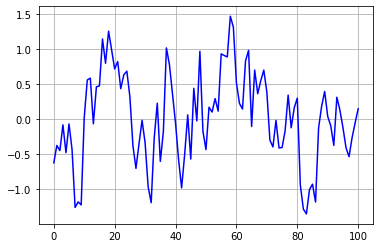

In [12]:
It=np.arange(t,T+1,1)
plt.plot(It,Xdata,"-b")
plt.grid()
plt.show()

In [50]:
def data(x,T,eps):
    T1=40
    T2=43
    T3=80
    T4=83
    y=np.zeros(T+1)
    for i in range(T+1):
        if i>=T1 and i<=T2:
            y[i]=0
        elif i>=T3 and i<=T4:
            y[i]=0
        else:
            y[i]=x[i]+eps[i]
    return y


Ydata=data(Xdata,T,eps)
print(Ydata)

[-0.69987131 -0.48397906 -0.43956597 -0.01036877 -0.46662741  0.04230003
 -0.37683422 -1.33744613 -1.11593588 -1.24240507 -0.07951511  0.68280501
  0.41562791  0.06071285  0.54217164  0.48027232  0.95775902  0.66816533
  1.14828175  0.9220062   0.79717424  0.68625711  0.47750146  0.53563605
  0.44434297  0.25835469 -0.45102828 -0.71224968 -0.35522068 -0.18259283
 -0.51277102 -0.99590004 -1.22340053 -0.31241745  0.26012991 -0.74555513
 -0.2726255   0.92159557  0.72094212  0.23788822  0.          0.
  0.          0.          0.02057721 -0.59340736  0.30288188  0.00686468
  1.00036448 -0.15772765 -0.65537925  0.06278102  0.05132395  0.55891937
  0.07707733  0.9403407   1.04719678  0.86253123  1.48828549  1.42004801
  0.55495272  0.31229351 -0.01649501  0.76714524  1.0699416  -0.22520999
  0.53784544  0.52641396  0.53360246  0.66006151  0.32464243 -0.27125116
 -0.23305086 -0.1115878  -0.34725687 -0.37778457 -0.03891598  0.21817576
 -0.12710384  0.18431005  0.          0.          0.       

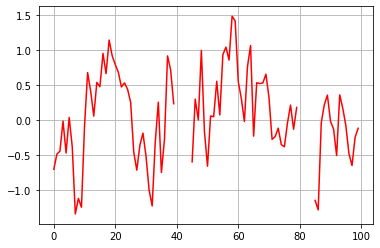

In [14]:
plt.plot(It[0:40],Ydata[0:40],"-r")
plt.plot(It[45:80],Ydata[45:80],"-r")
plt.plot(It[85:100],Ydata[85:100],"-r")
plt.grid()
plt.show()

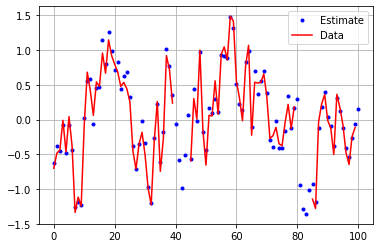

In [15]:
plt.plot(It,Xdata, ".b", label="Estimate")
plt.plot(It[0:40],Ydata[0:40],"-r", label="Data")
plt.plot(It[45:80],Ydata[45:80],"-r")
plt.plot(It[85:100],Ydata[85:100],"-r")
plt.legend()
plt.grid()
plt.show()

## Kalman Tutorial

In [16]:
alK=0.8
rK=0.1
qK=0.8
t=1
TK=100
deltaK=np.random.normal(0,q**2,TK)
x0K=np.random.normal(0,1,1)
epsK=np.random.normal(0,r**2,TK)

In [51]:
def processK(x0,T,alpha,delta):
    x=np.zeros(T+1)
    x[0]=x0
    for i in range(1,T+1,1):
        x[i]=alpha*x[i-1]+delta[i-1]
    return x


XdataK=processK(x0K,TK,alK,deltaK)
print(XdataK)

[ 0.13275486 -0.22043981  0.03207588  0.21415634  0.11487381 -0.18179439
  0.17612034 -0.2141965  -0.31032656 -0.39953483 -0.11629293 -0.00521395
 -0.28611072 -0.31054211 -0.25288786 -0.13254785 -0.07797779 -0.35897039
 -0.03432632  0.49386918  0.34964175  0.34729949  0.16596588  0.41158611
 -0.13351241 -0.33595876  0.15970281 -0.01060596 -0.00711322 -0.05908621
  0.12031502  0.11311843 -0.26331781 -0.18113785 -0.66274181 -0.68940525
 -0.42235223 -0.37912164 -0.0149919   0.07867676 -0.22501402 -0.36533926
  0.07247969  0.05926178  0.44806183  0.37472227  0.6954346   0.84708293
  0.75762657  0.77284842  0.60357838  0.32126618 -0.07459162 -0.21443137
 -0.1112882  -0.12650959 -0.11531668 -0.10123224 -0.25585195 -0.03889465
 -0.16390347 -0.39894841 -0.13354015 -0.05601533 -0.3726182  -0.04465091
 -0.14047403 -0.17307431  0.20181018 -0.10055784  0.00430286 -0.06842329
  0.17529685 -0.09001136  0.13365739  0.11637722 -0.24314583 -0.54644905
 -0.19447508 -0.26006202 -0.44601686 -0.15972873  0

In [52]:
def data(x,T,eps):
    y=np.zeros(T)
    for i in range(T):
        y[i]=x[i]+eps[i]
    return y


YdataK=data(XdataK,TK,epsK)
# print(len(YdataK))

In [19]:
def KALMAN(M_t,mu_00,Q_t,E_00,R_t,y_t,H_t):
    X_new=np.zeros(len(y_t))
    X_for=np.zeros(len(y_t))
    for k in range(len(y_t)):
        mu_t=M_t*mu_00
        E_t=Q_t+M_t*E_00*M_t
        K_t=(E_t*H_t)/(H_t*E_t*H_t+R_t)
        mu_tt=mu_t+K_t*(y_t[k]-H_t*mu_t)
        E_tt=(1-K_t*H_t)*E_t
        X_new[k]=np.random.normal(mu_tt,E_tt,1)
        X_for[k]=np.random.normal(mu_t,E_t,1)
        mu_00=mu_tt
        E_00=E_tt
    return [mu_t,E_t,K_t,mu_tt,E_tt,X_new,X_for]

In [53]:
M_t=alK
mu_00=0
Q_t=q**2
E_00=1
R_t=r**2
y_t=YdataK
H_t=1
KK=KALMAN(M_t,mu_00,Q_t,E_00,R_t,y_t,H_t)
print(KK[5])

[ 0.1543215  -0.21234779  0.03344997  0.21526654  0.1172741  -0.14225318
  0.17406656 -0.19990108 -0.28246668 -0.40455275 -0.11994249 -0.00771839
 -0.26607344 -0.29940559 -0.236458   -0.15181015 -0.07215654 -0.33805948
 -0.01899542  0.46641338  0.34905331  0.35373312  0.15719901  0.38314993
 -0.09902276 -0.32333609  0.15417063  0.02959445 -0.01382031 -0.06509013
  0.1115237   0.10810926 -0.24288337 -0.18860692 -0.63074407 -0.66880898
 -0.39648485 -0.38914322 -0.02779495  0.05537981 -0.21560031 -0.34702161
  0.06962214  0.06544832  0.41955222  0.36339297  0.64709323  0.83310927
  0.7861704   0.75598494  0.59781204  0.3169898  -0.06925835 -0.20893078
 -0.11645906 -0.12216417 -0.09791792 -0.09648544 -0.26052496 -0.04011403
 -0.14641549 -0.38920913 -0.12802744 -0.06098481 -0.3832499  -0.05989758
 -0.11393994 -0.16604564  0.19319987 -0.09207646 -0.00134836 -0.09268578
  0.16740239 -0.08154553  0.13079566  0.11034334 -0.26352389 -0.52747379
 -0.1963382  -0.25204919 -0.45846173 -0.17752055  0

##  3DVAR

### Rleated to Paris and London

In [55]:
import numpy as np

In [56]:
xb=np.array([10,5])
B=np.array([[1, 0.25], [0.25, 1]])
R=0.25
y=4
H=np.array([0, 1])

In [57]:
def X_hurt(xb,y,H,B,R):
    K=(B@H.T)/(H@B@H.T+R)
    X_h=xb+K*(y-H@xb)
    return X_h


resu=X_hurt(xb,y,H,B,R)
print(resu)

[9.8 4.2]


In [61]:
xb1=np.array([25.15,17])
resu1=X_hurt(xb1,y,H,B,R)
print(resu1)

[22.55  6.6 ]


### (b) To Kgl

In [62]:
Y_1=np.array([80,90,110,160,80,20,10,40,70,100,110,80])
Y_2=Y_1.T
X_1=np.array([76.9,91,114.2,154.2,88.1,18.6,11.4,31.1,69.6,105.7,112.7,77.4])
X_2=X_1.T

In [63]:
H_1=np.eye(12)
B_1=0.1*np.eye(12)
R_1=0.25*np.eye(12)

In [64]:
def X_hurt_1(L,Y,H,B,R):
    K=(B@H.T)*np.linalg.inv(H@B@H.T+R)
    X_h=L+K@(Y-H@L)
    return X_h


RESU_1=X_hurt_1(X_2,Y_2,H_1,B_1,R_1)
print(RESU_1)

[ 77.78571429  90.71428571 113.         155.85714286  85.78571429
  19.          11.          33.64285714  69.71428571 104.07142857
 111.92857143  78.14285714]


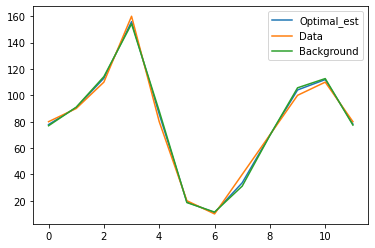

In [65]:
plt.plot(RESU_1, label="Optimal_est")
plt.plot(Y_2, label="Data")
plt.plot(X_2, label="Background")
plt.legend()
plt.show()

In [30]:
#(ii)
B_2=0.25*np.eye(12)
RESU_2=X_hurt_1(X_2,Y_2,H_1,B_2,R_1)
print(RESU_2)

[ 78.45  90.5  112.1  157.1   84.05  19.3   10.7   35.55  69.8  102.85
 111.35  78.7 ]


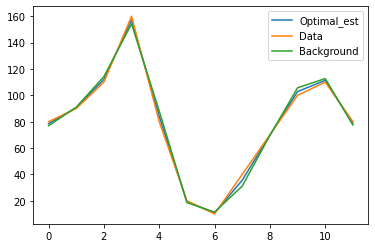

In [31]:
plt.plot(RESU_2, label="Optimal_est")
plt.plot(Y_2, label="Data")
plt.plot(X_2, label="Background")
plt.legend()
plt.show()

In [32]:
#(iii)
H_1[6:8,6:8]=0
H_2=H_1
RESU_3=X_hurt_1(X_2,Y_2,H_2,B_2,R_1)
print(RESU_3)

[ 78.45  90.5  112.1  157.1   84.05  19.3   11.4   31.1   69.8  102.85
 111.35  78.7 ]


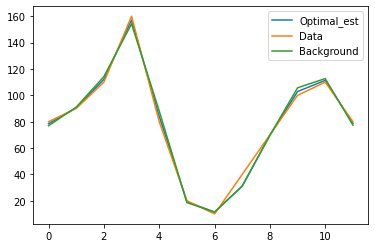

In [33]:
plt.plot(RESU_3, label="Optimal_est")
plt.plot(Y_2, label="Data")
plt.plot(X_2, label="Background")
plt.legend()
plt.show()

## Last tutly

In [34]:
x_b=np.array([12,13,15,19,17])
L=x_b.T
y=np.array([13.2, 14.9, 16.9, 18, 19.8])
Y=y.T

In [35]:
sigb=0.5
cvb=0.125
N=5

In [36]:
def matrix_B(sigb,cvb,N):
    BM=np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i==j:
                BM[i,j]=sigb
            if (i>j and i==j+1) or (i<j and j==i+1):
                BM[i,j]=cvb
    return BM


BM_1=matrix_B(sigb,cvb,N)

In [37]:
def X_hurt1(L,Y,H,B,R):
    K=(B@H.T)*np.linalg.inv(H@B@H.T+R)
    X_h=L+K@(Y-H@L)
    return X_h

In [38]:
H1=np.eye(5)
R1=0.25*np.eye(5)
resu2=X_hurt1(L,Y,H1,BM_1,R1)
print(resu2)

[12.76761905 14.24943723 16.31616162 18.15350649 18.95105339]


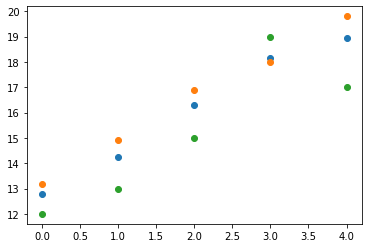

In [39]:
plt.plot(resu2,'o')
plt.plot(Y,'o')
plt.plot(L,'o')
plt.show()

In [40]:
sig_b=0.8
cv_b=0.35
BM2=matrix_B(sig_b,cv_b,N)
resu3=X_hurt1(L,Y,H1,BM2,R1)
print(resu3)

[12.77053571 14.40833333 16.78015873 17.275      19.59027778]


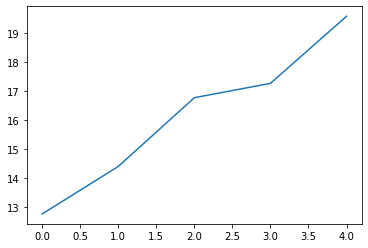

In [41]:
plt.plot(resu3)
# plt.plot(Y)
# plt.plot(L)
plt.show()

## Qz

In [42]:
x_b=np.array([13,12,15,19,17])
L=x_b.T
y=np.array([13.2, 14.9, 16.9, 18, 19.8])
Y=y.T

In [43]:
sig_b=0.5
cv_b=0.125
N=5

In [44]:
def matrix_imp(sig_b,cv_b,N):
    BM=np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i==j:
                BM[i,j]=sig_b
            if (i>j and i==j+1) or (i<j and j==i+1):
                BM[i,j]=cv_b
    return BM


B_b= matrix_imp(sig_b,cv_b,N)
print(B_b)

[[0.5   0.125 0.    0.    0.   ]
 [0.125 0.5   0.125 0.    0.   ]
 [0.    0.125 0.5   0.125 0.   ]
 [0.    0.    0.125 0.5   0.125]
 [0.    0.    0.    0.125 0.5  ]]


In [45]:
#(a)
def X_hurt_b(L,Y,H,B,R):
    K=(B@H.T)*np.linalg.inv(H@B@H.T+R)
    X_h=L+K@(Y-H@L)
    return X_h



H_b=np.eye(5)
R_b=0.25*np.eye(5)
resu_b=X_hurt_b(L,Y,H_b,B_b,R_b)
print(resu_b)

[13.05189033 13.98536797 16.28585859 18.15350649 18.95105339]


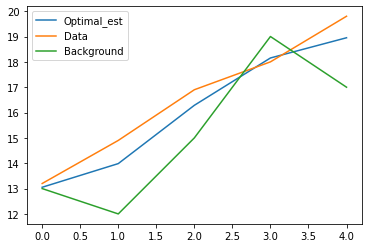

In [46]:
plt.plot(resu_b, label="Optimal_est")
plt.plot(Y, label="Data")
plt.plot(L, label="Background")
plt.legend()
plt.show()

In [47]:
#(b)
sig_B=0.9
cv_B=0.25
B_B= matrix_imp(sig_B,cv_B,N)
resu_B=X_hurt_b(L,Y,H_b,B_B,R_b)

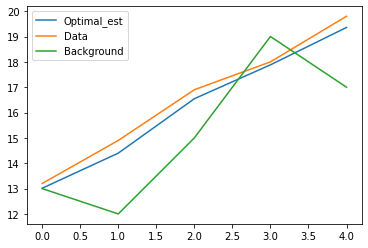

In [48]:
plt.plot(resu_B, label="Optimal_est")
plt.plot(Y, label="Data")
plt.plot(L, label="Background")
plt.legend()
plt.show()